In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

In [24]:
%matplotlib inline

In [58]:
df = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

df = df[sorted(df.columns)]

ids = df.pop('ID')
target = df.pop('target')

test_set = test_set[sorted(test_set.columns)]
test_ids = test_set.pop('ID')

In [8]:
regressor = RandomForestRegressor()
regressor.fit(df, target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [46]:
test_ids = test_set.pop('ID')

In [47]:
test_set = test_set[sorted(test_set.columns)]

In [14]:
predictions = regressor.predict(test_set)

In [20]:
submission = pd.DataFrame({'ID': test_ids, 'target': predictions})

submission.to_csv('first_submission.csv', index=None)

(array([2783.,  598.,  401.,  157.,  228.,   74.,   55.,   64.,   39.,
          60.]),
 array([3.0000e+04, 4.0270e+06, 8.0240e+06, 1.2021e+07, 1.6018e+07,
        2.0015e+07, 2.4012e+07, 2.8009e+07, 3.2006e+07, 3.6003e+07,
        4.0000e+07]),
 <a list of 10 Patch objects>)

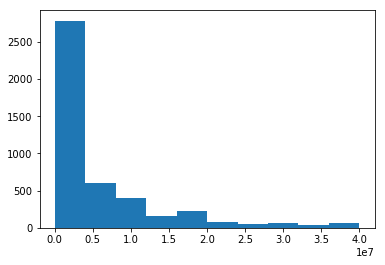

In [25]:
plt.hist(target)

# Log transformation of target

In [60]:
target.min()

30000.0

In [61]:
target = target/10000

In [62]:
target = np.log10(target)

In [63]:
regressor.fit(df, target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [64]:
predictions = regressor.predict(test_set)

In [65]:
predictions[4]

2.2414277920309167

In [66]:
predictions = np.power(10, predictions)

In [67]:
predictions = predictions*10000

In [68]:
submission = pd.DataFrame({'ID': test_ids, 'target': predictions})

submission.to_csv('second_submission.csv', index=None)

In [69]:
predictions[0]

4975521.193915802